In [1]:
import sys, re, csv
import traceback
sys.path.insert(0, r'C:\Users\shadd\OneDrive\Documents\Python\frxas.py')
import glob
import numpy as np
from numpy import fft
import pandas as pd

import matplotlib.pyplot as plt

from frxas import time_domain, models, hdf5_io
from lmfit import fit_report
%reload_ext autoreload
%autoreload 2

### In variable names 'g' is gas index, and 'f' is frequency index. Ex: g2_f1_dict contains all the harmonic coefficients of data collected in the 2nd gas condition and the first frequency.

In [2]:
g1_f1_files = glob.glob('..\\July2018 Data Fits\\1% O2\\20201211_processed\\0.25 Hz 150 mV P[0-9]*_Ir.h5')
# g1_f2_files = glob.glob('..\\July2018 Data Fits\\1% O2\\20201211_processed\\1 Hz 150 mV P[0-9]*_Ir.h5')
g1_f1_dict = {}
for f_name in g1_f1_files:
    file = hdf5_io.load_time_domain_fit(f_name[:-3])
    suffix = f_name.split('mV ')[-1].split('_')[0][1:]
    g1_f1_dict = hdf5_io.extract_time_domain_fit(file, suffix, harmonics=4, fit_dict=g1_f1_dict)
    
print(len(list(g1_f1_dict['positions'].values())))

21


In [3]:
g1_f2_files = glob.glob('..\\July2018 Data Fits\\1% O2\\20201211_processed\\1 Hz 150 mV P[0-9]*_Ir.h5')
# g1_f2_files = glob.glob('..\\July2018 Data Fits\\1% O2\\20201211_processed\\1 Hz 150 mV P[0-9]*_Ir.h5')
g1_f2_dict = {}
for f_name in g1_f2_files:
    # P15 and P14 data points don't look good. Data is in the noisy region that is dropped from DC linescans
    if "P15" not in f_name and "P19" not in f_name:
        file = hdf5_io.load_time_domain_fit(f_name[:-3])
        suffix = f_name.split('mV ')[-1].split('_')[0][1:]
        g1_f2_dict = hdf5_io.extract_time_domain_fit(file, suffix, harmonics=4, fit_dict=g1_f2_dict)

print(len(list(g1_f2_dict['positions'].values())))

17


In [4]:
g1_f3_files = glob.glob('..\\July2018 Data Fits\\1% O2\\20201211_processed\\4 Hz 150 mV P[0-9]*_Ir.h5')
# g1_f2_files = glob.glob('..\\July2018 Data Fits\\1% O2\\20201211_processed\\1 Hz 150 mV P[0-9]*_Ir.h5')
g1_f3_dict = {}
for f_name in g1_f3_files:
    file = hdf5_io.load_time_domain_fit(f_name[:-3])
    suffix = f_name.split('mV ')[-1].split('_')[0][1:]
    g1_f3_dict = hdf5_io.extract_time_domain_fit(file, suffix, harmonics=4, fit_dict=g1_f3_dict)

print(len(list(g1_f3_dict['positions'].values())))

21


In [5]:
g2_f1_files = glob.glob('..\\July2018 Data Fits\\10% O2\\20201211_processed\\0.25 Hz 150 mV P[0-9]*_Ir.h5')
# g1_f2_files = glob.glob('..\\July2018 Data Fits\\1% O2\\20201211_processed\\1 Hz 150 mV P[0-9]*_Ir.h5')
g2_f1_dict = {}
for f_name in g2_f1_files:
    file = hdf5_io.load_time_domain_fit(f_name[:-3])
    suffix = f_name.split('mV ')[-1].split('_')[0][1:]
    g2_f1_dict = hdf5_io.extract_time_domain_fit(file, suffix, harmonics=4, fit_dict=g2_f1_dict)

print(len(list(g2_f1_dict['positions'].values())))

33


In [6]:
g2_f2_files = glob.glob('..\\July2018 Data Fits\\10% O2\\20201211_processed\\1 Hz 150 mV P[0-9]*_Ir.h5')
# g1_f2_files = glob.glob('..\\July2018 Data Fits\\1% O2\\20201211_processed\\1 Hz 150 mV P[0-9]*_Ir.h5')
g2_f2_dict = {}
for f_name in g2_f2_files:
    file = hdf5_io.load_time_domain_fit(f_name[:-3])
    suffix = f_name.split('mV ')[-1].split('_')[0][1:]
    g2_f2_dict = hdf5_io.extract_time_domain_fit(file, suffix, harmonics=4, fit_dict=g2_f2_dict)

print(len(list(g2_f2_dict['positions'].values())))

24


In [7]:
g2_f3_files = glob.glob('..\\July2018 Data Fits\\10% O2\\20201211_processed\\5 Hz 150 mV P[0-9]*_Ir.h5')
# g1_f2_files = glob.glob('..\\July2018 Data Fits\\1% O2\\20201211_processed\\1 Hz 150 mV P[0-9]*_Ir.h5')
g2_f3_dict = {}
for f_name in g2_f3_files:
    file = hdf5_io.load_time_domain_fit(f_name[:-3])
    suffix = f_name.split('mV ')[-1].split('_')[0][1:]
    g2_f3_dict = hdf5_io.extract_time_domain_fit(file, suffix, harmonics=4, fit_dict=g2_f3_dict)

print(len(list(g2_f3_dict['positions'].values())))

13


In [8]:
g3_f1_files = glob.glob('..\\July2018 Data Fits\\100% O2\\20201211_processed\\0.5 Hz 150 mV P[0-9]*_Ir.h5')
# g1_f2_files = glob.glob('..\\July2018 Data Fits\\1% O2\\20201211_processed\\1 Hz 150 mV P[0-9]*_Ir.h5')
g3_f1_dict = {}
for f_name in g3_f1_files:
    file = hdf5_io.load_time_domain_fit(f_name[:-3])
    suffix = f_name.split('mV ')[-1].split('_')[0][1:]
    g3_f1_dict = hdf5_io.extract_time_domain_fit(file, suffix, harmonics=4, fit_dict=g3_f1_dict)

print(len(list(g3_f1_dict['positions'].values())))

9


In [9]:
g3_f2_files = glob.glob('..\\July2018 Data Fits\\100% O2\\20201211_processed\\8 Hz 150 mV P[0-9]*_Ir.h5')
# g1_f2_files = glob.glob('..\\July2018 Data Fits\\1% O2\\20201211_processed\\1 Hz 150 mV P[0-9]*_Ir.h5')
g3_f2_dict = {}
for f_name in g3_f2_files:
    file = hdf5_io.load_time_domain_fit(f_name[:-3])
    suffix = f_name.split('mV ')[-1].split('_')[0][1:]
    g3_f2_dict = hdf5_io.extract_time_domain_fit(file, suffix, harmonics=4, fit_dict=g3_f2_dict)

print(len(list(g3_f2_dict['positions'].values())))

18


### DC Profiles

In [10]:
direc = 'G:\\My Drive\\UW Research\\fr-XAS July 2018\\Data\\XANES+Line Scans\\1% O2'

dc_1_n150 = pd.read_csv(direc + '\\1%_n150mV.txt', sep='\t')
dc_1_p150 = pd.read_csv(direc + '\\1%_p150mV.txt', sep='\t')

direc = 'G:\\My Drive\\UW Research\\fr-XAS July 2018\\Data\\XANES+Line Scans\\10% O2'

dc_10_n150 = pd.read_csv(direc + '\\10%_n150mV.txt', sep='\t')
dc_10_p150 = pd.read_csv(direc + '\\10%_p150mV.txt', sep='\t')

direc = 'G:\\My Drive\\UW Research\\fr-XAS July 2018\\Data\\XANES+Line Scans\\100% O2'

dc_100_n150 = pd.read_csv(direc + '\\100%_n150mV.txt', sep='\t')
dc_100_p100 = pd.read_csv(direc + '\\100%_p100mV.txt', sep='\t')

200    0.0
Name: z, dtype: float64


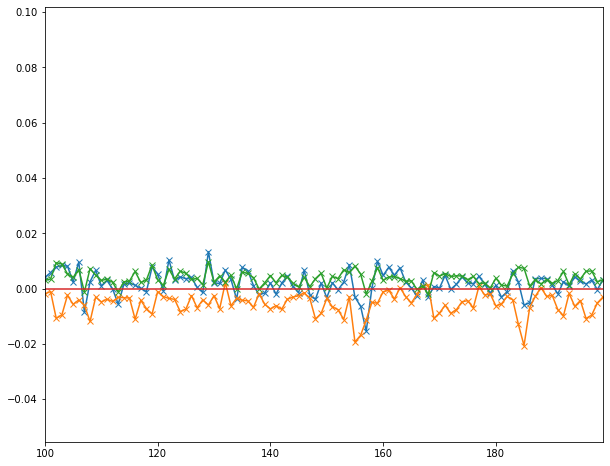

In [11]:
pos = dc_1_n150.z
negs = (dc_1_n150.bias / dc_1_n150.ocv) - 1
posis = (dc_1_p150.bias / dc_1_p150.ocv) - 1
means = (negs - posis) / 2

_, ax = plt.subplots(figsize=(10,8))
ax.plot(pos, negs, '-x')
ax.plot(pos, posis, '-x')
ax.plot(pos, means, '-x')
ax.plot(pos, np.zeros(pos.shape))
# ax.plot(hdf5_io.dict_vals_to_array(g1_f0_dict['positions']), hdf5_io.dict_vals_to_array(g1_f0_dict['h1_re']))
print(pos.where(pos==0).dropna())
ax.set_xlim(100, pos.iloc[-1])
# ax.ylim(-.025, .04)
plt.show()

### Take out some outliers in 1%O2 data

In [12]:
drop_inds = list(range(263, 283))
# drop_inds.append(278)
# drop_inds.append(280)
# drop_inds.append(282)
print(pos[drop_inds])
dc_1_n150 = dc_1_n150.drop(drop_inds)
dc_1_p150 = dc_1_p150.drop(drop_inds)

263    63
264    64
265    65
266    66
267    67
268    68
269    69
270    70
271    71
272    72
273    73
274    74
275    75
276    76
277    77
278    78
279    79
280    80
281    81
282    82
Name: z, dtype: int64


(50.0, 90.0)

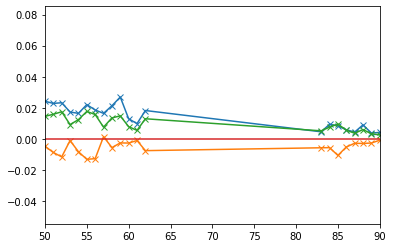

In [13]:
pos = dc_1_n150.z
negs = (dc_1_n150.bias / dc_1_n150.ocv) - 1
posis = (dc_1_p150.bias / dc_1_p150.ocv) - 1
means = (negs - posis) / 2

plt.plot(pos, negs, '-x')
plt.plot(pos, posis, '-x')
plt.plot(pos, means, '-x')
plt.plot(pos, np.zeros(pos.shape))
# plt.plot(hdf5_io.dict_vals_to_array(g1_f0_dict['positions']), hdf5_io.dict_vals_to_array(g1_f0_dict['h1_re']))

plt.xlim(50, 90)
# plt.ylim(-.025, .04)

### Now 10% O2 data

148    0.0
Name: z, dtype: float64


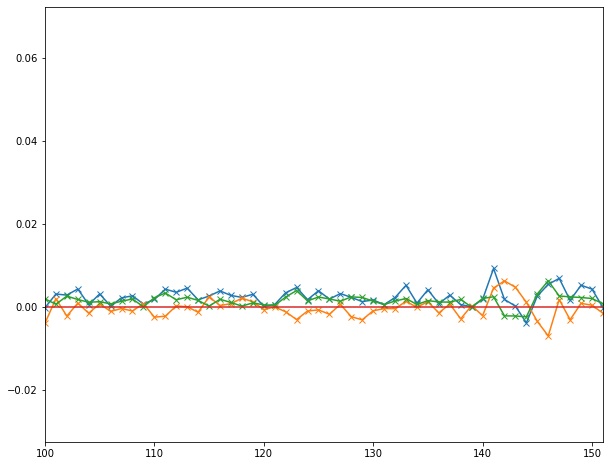

In [14]:
pos = dc_10_n150.z
negs = (dc_10_n150.bias / dc_10_n150.ocv) - 1
posis = (dc_10_p150.bias / dc_10_p150.ocv) - 1
means = (negs - posis) / 2
_, ax = plt.subplots(figsize=(10,8))
ax.plot(pos, negs, '-x')
ax.plot(pos, posis, '-x')
ax.plot(pos, means, '-x')
ax.plot(pos, np.zeros(pos.shape))
# ax.plot(hdf5_io.dict_vals_to_array(g1_f0_dict['positions']), hdf5_io.dict_vals_to_array(g1_f0_dict['h1_re']))
print(pos.where(pos==0).dropna())
ax.set_xlim(100, pos.iloc[-1])
# ax.ylim(-.025, .04)
plt.show()

### Take out some outliers in 10%O2 data

In [15]:
drop_inds = [list(range(216, 229))]
drop_inds.append(list(range(288, 300)))
drop_inds = [item for sublist in drop_inds for item in sublist]
print(pos[drop_inds])
dc_10_n150 = dc_10_n150.drop(drop_inds)
dc_10_p150 = dc_10_p150.drop(drop_inds)

216     68
217     69
218     70
219     71
220     72
221     73
222     74
223     75
224     76
225     77
226     78
227     79
228     80
288    140
289    141
290    142
291    143
292    144
293    145
294    146
295    147
296    148
297    149
298    150
299    151
Name: z, dtype: int64


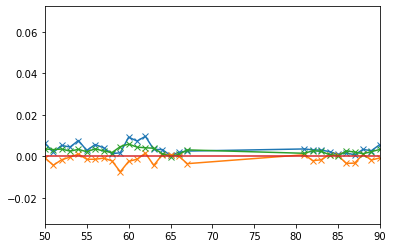

In [16]:
pos = dc_10_n150.z
negs = (dc_10_n150.bias / dc_10_n150.ocv) - 1
posis = (dc_10_p150.bias / dc_10_p150.ocv) - 1
means = (negs - posis) / 2

plt.plot(pos, negs, '-x')
plt.plot(pos, posis, '-x')
plt.plot(pos, means, '-x')
plt.plot(pos, np.zeros(pos.shape))
# plt.plot(hdf5_io.dict_vals_to_array(g1_f0_dict['positions']), hdf5_io.dict_vals_to_array(g1_f0_dict['h1_re']))

plt.xlim(50, 90)
# plt.ylim(-.025, .04)
plt.show()

### Now 100% O2 data

98    0.0
Name: z, dtype: float64


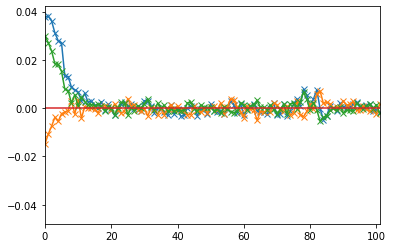

In [17]:
pos = dc_100_n150.z
negs = (dc_100_n150.bias / dc_100_n150.ocv) - 1
posis = (dc_100_p100.bias / dc_100_p100.ocv) - 1
means = (negs - posis*1.5) / 2

plt.plot(pos, negs, '-x')
plt.plot(pos, posis, '-x')
plt.plot(pos, means, '-x')
plt.plot(pos, np.zeros(pos.shape))
# plt.plot(hdf5_io.dict_vals_to_array(g1_f0_dict['positions']), hdf5_io.dict_vals_to_array(g1_f0_dict['h1_re']))
print(pos.where(pos==0).dropna())
plt.xlim(0, pos.iloc[-1])
# plt.ylim(-.025, .04)
plt.show()

### Drop 100% DC data past 65 um away from the gate (furthest measured point in FR-XAS profiles)

In [18]:
drop_inds = list(range(164, 200))
# print(pos[drop_inds])
dc_100_n150 = dc_100_n150.drop(drop_inds)
dc_100_p100 = dc_100_p100.drop(drop_inds)

(50.0, 95.0)

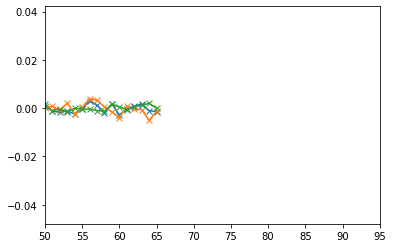

In [19]:
pos = dc_100_n150.z
negs = (dc_100_n150.bias / dc_100_n150.ocv) - 1
posis = (dc_100_p100.bias / dc_100_p100.ocv) - 1
means = (negs - posis) / 2

plt.plot(pos, negs, '-x')
plt.plot(pos, posis, '-x')
plt.plot(pos, means, '-x')
# plt.plot(hdf5_io.dict_vals_to_array(g1_f0_dict['positions']), hdf5_io.dict_vals_to_array(g1_f0_dict['h1_re']))

plt.xlim(50, 95)
# plt.ylim(-.025, .04)

### We'll make dicts of DC data with the same format as osciallatory data

In [20]:
g1_f0_dict = hdf5_io.extract_DC_profile(dc_1_n150, harmonics=4, pos_df=dc_1_p150)
g2_f0_dict = hdf5_io.extract_DC_profile(dc_10_n150, harmonics=4, pos_df=dc_10_p150)
g3_f0_dict = hdf5_io.extract_DC_profile(dc_100_n150, harmonics=4, pos_df=dc_100_p100)

### Finally, create HDF5 file to store all the profiles.

In [21]:
po2s = ['1%_O2', '10%_O2', '100%_O2']
hdf5_io.create_frxas_profile_hdf5('..\\Model Fitting\\July18_20201211_processed', po2s)

In [22]:
po2s = ['1%_O2', '10%_O2', '100%_O2']
f1 = hdf5_io.open_hdf5('..\\Model Fitting\\July18_20201211_processed')

In [23]:
# 1% O2 data
harmonics = 4
g_freqs = [0.25, 1, 4, 0]
g_dicts = [g1_f1_dict, g1_f2_dict, g1_f3_dict, g1_f0_dict]
po2 = po2s[0]
for f, g_dict in enumerate(g_dicts):
    sort_ind = hdf5_io.dict_vals_to_array(g_dict['positions']).argsort()
    positions = hdf5_io.dict_vals_to_array(g_dict['positions'])[sort_ind]
    ir_avgs = hdf5_io.dict_vals_to_array(g_dict['ir_avg'])[sort_ind]
    for k in range(1, harmonics+1):
        re_vals = hdf5_io.dict_vals_to_array(g_dict[f'h{k}_re'])[sort_ind]
        im_vals = hdf5_io.dict_vals_to_array(g_dict[f'h{k}_im'])[sort_ind]
        data = np.array([re_vals, im_vals])
        hdf5_io.add_frxas_profile(f1, po2, g_freqs[f], positions, data,
                                  harmonic=k, ir_avgs=ir_avgs)

Added Harmonic 1 to 0.01% 0.25 Hz
Added Harmonic 2 to 0.01% 0.25 Hz
Added Harmonic 3 to 0.01% 0.25 Hz
Added Harmonic 4 to 0.01% 0.25 Hz
Added Harmonic 1 to 0.01% 1 Hz
Added Harmonic 2 to 0.01% 1 Hz
Added Harmonic 3 to 0.01% 1 Hz
Added Harmonic 4 to 0.01% 1 Hz
Added Harmonic 1 to 0.01% 4 Hz
Added Harmonic 2 to 0.01% 4 Hz
Added Harmonic 3 to 0.01% 4 Hz
Added Harmonic 4 to 0.01% 4 Hz
Added Harmonic 1 to 0.01% 0 Hz
Added Harmonic 2 to 0.01% 0 Hz
Added Harmonic 3 to 0.01% 0 Hz
Added Harmonic 4 to 0.01% 0 Hz


In [24]:
# 10% O2 data
harmonics = 4
g_freqs = [0.25, 1, 5, 0]
g_dicts = [g2_f1_dict, g2_f2_dict, g2_f3_dict, g2_f0_dict]
po2 = po2s[1]
for f, g_dict in enumerate(g_dicts):
    sort_ind = hdf5_io.dict_vals_to_array(g_dict['positions']).argsort()
    positions = hdf5_io.dict_vals_to_array(g_dict['positions'])[sort_ind]
    ir_avgs = hdf5_io.dict_vals_to_array(g_dict['ir_avg'])[sort_ind]
    for k in range(1, harmonics+1):
        re_vals = hdf5_io.dict_vals_to_array(g_dict[f'h{k}_re'])[sort_ind]
        im_vals = hdf5_io.dict_vals_to_array(g_dict[f'h{k}_im'])[sort_ind]
        data = np.array([re_vals, im_vals])
        hdf5_io.add_frxas_profile(f1, po2, g_freqs[f], positions, data,
                                  harmonic=k, ir_avgs=ir_avgs)

Added Harmonic 1 to 0.1% 0.25 Hz
Added Harmonic 2 to 0.1% 0.25 Hz
Added Harmonic 3 to 0.1% 0.25 Hz
Added Harmonic 4 to 0.1% 0.25 Hz
Added Harmonic 1 to 0.1% 1 Hz
Added Harmonic 2 to 0.1% 1 Hz
Added Harmonic 3 to 0.1% 1 Hz
Added Harmonic 4 to 0.1% 1 Hz
Added Harmonic 1 to 0.1% 5 Hz
Added Harmonic 2 to 0.1% 5 Hz
Added Harmonic 3 to 0.1% 5 Hz
Added Harmonic 4 to 0.1% 5 Hz
Added Harmonic 1 to 0.1% 0 Hz
Added Harmonic 2 to 0.1% 0 Hz
Added Harmonic 3 to 0.1% 0 Hz
Added Harmonic 4 to 0.1% 0 Hz


In [25]:
# 100% O2 data
harmonics = 4
g_freqs = [0.5, 8, 0]
g_dicts = [g3_f1_dict, g3_f2_dict, g3_f0_dict]
po2 = po2s[2]
for f, g_dict in enumerate(g_dicts):
    sort_ind = hdf5_io.dict_vals_to_array(g_dict['positions']).argsort()
    positions = hdf5_io.dict_vals_to_array(g_dict['positions'])[sort_ind]
    ir_avgs = hdf5_io.dict_vals_to_array(g_dict['ir_avg'])[sort_ind]
    for k in range(1, harmonics+1):
        re_vals = hdf5_io.dict_vals_to_array(g_dict[f'h{k}_re'])[sort_ind]
        im_vals = hdf5_io.dict_vals_to_array(g_dict[f'h{k}_im'])[sort_ind]
        data = np.array([re_vals, im_vals])
        hdf5_io.add_frxas_profile(f1, po2, g_freqs[f], positions,
                                  data, harmonic=k, ir_avgs=ir_avgs)

Added Harmonic 1 to 1.0% 0.5 Hz
Added Harmonic 2 to 1.0% 0.5 Hz
Added Harmonic 3 to 1.0% 0.5 Hz
Added Harmonic 4 to 1.0% 0.5 Hz
Added Harmonic 1 to 1.0% 8 Hz
Added Harmonic 2 to 1.0% 8 Hz
Added Harmonic 3 to 1.0% 8 Hz
Added Harmonic 4 to 1.0% 8 Hz
Added Harmonic 1 to 1.0% 0 Hz
Added Harmonic 2 to 1.0% 0 Hz
Added Harmonic 3 to 1.0% 0 Hz
Added Harmonic 4 to 1.0% 0 Hz


In [26]:
f1.close()

In [28]:
# Adding some exp conditions
f1 = hdf5_io.open_hdf5('..\\Model Fitting\\July18_20201211_processed')

f1['1%_O2'].attrs['Gas'] = 0.01
f1['1%_O2/0.25_Hz'].attrs['Start_Index'] = 4
f1['1%_O2/1_Hz'].attrs['Start_Index'] = 2
f1['1%_O2/4_Hz'].attrs['Start_Index'] = 2
f1['1%_O2/0_Hz'].attrs['Start_Index'] = 199

f1['10%_O2'].attrs['Gas'] = 0.10
f1['10%_O2/0.25_Hz'].attrs['Start_Index'] = 4
f1['10%_O2/1_Hz'].attrs['Start_Index'] = 6
f1['10%_O2/5_Hz'].attrs['Start_Index'] = 0
f1['10%_O2/0_Hz'].attrs['Start_Index'] = 147

f1['100%_O2'].attrs['Gas'] = 1
f1['100%_O2/0.5_Hz'].attrs['Start_Index'] = 1
f1['100%_O2/8_Hz'].attrs['Start_Index'] = 2
f1['100%_O2/0_Hz'].attrs['Start_Index'] = 97

f1.close()

# Old 

### Constructing postion dicts to add into profile files later

In [6]:
direc = r'E:\\UW Research\\fr-XAS July 2018\\Data\\1% O2\\0.25 Hz 150 mV'
all_files = glob.glob(direc + '\\P[0-9]*')
all_files.sort(key=sortfunc)
locs = [427,428,429,430,431,432,433,434,438,447,457,452,462,469,472,475,480,483,485,497,585]
Pos1_0_25Hz = {}
for loc, file in zip(locs,all_files):
    point = file.split('\\')[-1]
    Pos1_0_25Hz[point]=loc

f0 = open('..\\July2018 Data Fits\\1% O2\\20201211_processed\\0.25 Hz Positions.csv', 'w+', newline='')
f = csv.writer(f0)
for key, val in Pos1_0_25Hz.items():
    f.writerow([key, val])
f0.close()

In [7]:
# The files for "15-2" fuck up everything about sorting the list so that I don't have to rearrange the locs list. super annoying.
points = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','16','17','18','19']
locs = [431,432,433,434,435,436,437,438,439,443,450,453,458,463,475,484,543,465]
Pos1_1Hz = {}
for loc, point in zip(locs,points):
    Pos1_1Hz[point]=loc

f0 = open('..\\July2018 Data Fits\\1% O2\\20201211_processed\\1 Hz Positions.csv', 'w+', newline='')
f = csv.writer(f0)
for key, val in Pos1_1Hz.items():
    f.writerow([key, val])
f0.close()

In [8]:
direc = r'D:\\UW Research\\fr-XAS July 2018\\Data\\1% O2\\4 Hz 150 mV'
all_files = glob.glob(direc + '\\P[0-9]*')
all_files.sort(key=sortfunc)
locs = [433,434,435,436,437,438,431,432,439,440,441,442,443,444,445,447,449,480,446,451,444]
Pos1_4Hz = {}
for loc, file in zip(locs,all_files):
    point = file.split('\\')[-1]
    Pos1_4Hz[point]=loc

f0 = open('..\\July2018 Data Fits\\1% O2\\20201211_processed\\4 Hz Positions.csv', 'w+', newline='')
f = csv.writer(f0)
for key, val in Pos1_4Hz.items():
    f.writerow([key, val])
f0.close()

In [9]:
# The files for "13-2" and "21-2" fuck up everything about sorting the list so that I don't have to rearrange the locs list. super annoying.
points = ['1','2','3','4','5','6','7','8','9','10','11','12','14','15','13-2','16','17','18','19','20','22','21-2','23','24','25','26','27','28','29','30','31','32','33']
locs = [408,409,410,411,412,413,414,417,420,423,415,426,432,435,429,443,451,459,467,475,495,485,454,457,462,465,448,445,427,437,421,418,416]
Pos10_0_25Hz = {}
for loc, point in zip(locs,points):
    Pos10_0_25Hz[point]=loc

f0 = open('..\\July2018 Data Fits\\10% O2\\20201211_processed\\0.25 Hz Positions.csv', 'w+', newline='')
f = csv.writer(f0)
for key, val in Pos10_0_25Hz.items():
    f.writerow([key, val])
f0.close()

In [10]:
direc = r'D:\\UW Research\\fr-XAS July 2018\\Data\\10% O2\\1 Hz 150 mV'
all_files = glob.glob(direc + '\\P[0-9]*')
all_files.sort(key=sortfunc)
locs = [408,409,410,411,412,413,414,415,416,417,419,421,423,425,427,429,432,435,438,440,442,439,444,454]
Pos10_1Hz = {}
for loc, file in zip(locs,all_files):
    point = file.split('\\')[-1]
    Pos10_1Hz[point]=loc

f0 = open('..\\July2018 Data Fits\\10% O2\\20201211_processed\\1 Hz Positions.csv', 'w+', newline='')
f = csv.writer(f0)
for key, val in Pos10_1Hz.items():
    f.writerow([key, val])
f0.close()

In [11]:
direc = r'D:\\UW Research\\fr-XAS July 2018\\Data\\10% O2\\5 Hz 150 mV'
all_files = glob.glob(direc + '\\P[0-9]*')
all_files.sort(key=sortfunc)
locs = [412,414,416,418,420,422,424,426,428,430,432,434,444]
Pos10_5Hz = {}
for loc, file in zip(locs,all_files):
    point = file.split('\\')[-1]
    Pos10_5Hz[point]=loc

f0 = open('..\\July2018 Data Fits\\10% O2\\20201211_processed\\5 Hz Positions.csv', 'w+', newline='')
f = csv.writer(f0)
for key, val in Pos10_5Hz.items():
    f.writerow([key, val])
f0.close()

In [12]:
direc = r'D:\\UW Research\\fr-XAS July 2018\\Data\\100% O2\\0.5 Hz 150 mV'
all_files = glob.glob(direc + '\\P[0-9]*')
all_files.sort(key=sortfunc)
locs = [419,419.5,420,422,424,427,446,460,438]
Pos100_0_5Hz = {}
for loc, file in zip(locs,all_files):
    point = file.split('\\')[-1]
    Pos100_0_5Hz[point]=loc

f0 = open('..\\July2018 Data Fits\\100% O2\\20201211_processed\\0.5 Hz Positions.csv', 'w+', newline='')
f = csv.writer(f0)
for key, val in Pos100_0_5Hz.items():
    f.writerow([key, val])
f0.close()

In [13]:
direc = r'D:\\UW Research\\fr-XAS July 2018\\Data\\100% O2\\8 Hz 150 mV'
all_files = glob.glob(direc + '\\P[0-9]*')
all_files.sort(key=sortfunc)
locs = [418.5,419,419.5,420,420.5,421,421.5,422,422.5,423,425,427,429,430,425.5,428,424,485]
Pos100_8Hz = {}
for loc, file in zip(locs,all_files):
    point = file.split('\\')[-1]
    Pos100_8Hz[point]=loc

f0 = open('..\\July2018 Data Fits\\100% O2\\20201211_processed\\8 Hz Positions.csv', 'w+', newline='')
f = csv.writer(f0)
for key, val in Pos100_8Hz.items():
    f.writerow([key, val])
f0.close()

## Reading in time domain fit reports
### 1% O2

In [14]:
harmonics = 4

re_dict, im_dict = {}, {}

for i in range(1, harmonics+1):
    re_dict[f'h{i}'] = []
    im_dict[f'h{i}'] = []

In [36]:
Pos1_0_25Hz = np.genfromtxt('..\\July2018 Data Fits\\1% O2\\20201211_processed\\0.25 Hz Positions.csv', delimiter=',')[:,1]
Re1_0_25Hz_H1, Im1_0_25Hz_H1 = [], []
Re1_0_25Hz_H2, Im1_0_25Hz_H2 = [], []
Re1_0_25Hz_H3, Im1_0_25Hz_H3 = [], []
Re1_0_25Hz_H4, Im1_0_25Hz_H4 = [], []
all_files = glob.glob('..\\July2018 Data Fits\\1% O2\\20201211_processed\\0.25 Hz 150 mV P[0-9]*_Ir.h5')
all_files.sort(key=sortfunc2)
for file in all_files:
    print(file)
    dum = hdf5_io.load_time_domain_fit(file[:-3])
    Re1_0_25Hz_H1.append(dum.params['h1_re_comp'].value)
    Im1_0_25Hz_H1.append(dum.params['h1_im_comp'].value)
    Re1_0_25Hz_H2.append(dum.params['h2_re_comp'].value)
    Im1_0_25Hz_H2.append(dum.params['h2_im_comp'].value)
    Re1_0_25Hz_H3.append(dum.params['h3_re_comp'].value)
    Im1_0_25Hz_H3.append(dum.params['h3_im_comp'].value)
    Re1_0_25Hz_H4.append(dum.params['h4_re_comp'].value)
    Im1_0_25Hz_H4.append(dum.params['h4_im_comp'].value)

Re1_0_25Hz_H1 = sort_by_pos(Re1_0_25Hz_H1, Pos1_0_25Hz)
Im1_0_25Hz_H1 = sort_by_pos(Im1_0_25Hz_H1, Pos1_0_25Hz)
Re1_0_25Hz_H2 = sort_by_pos(Re1_0_25Hz_H2, Pos1_0_25Hz)
Im1_0_25Hz_H2 = sort_by_pos(Im1_0_25Hz_H2, Pos1_0_25Hz)
Re1_0_25Hz_H3 = sort_by_pos(Re1_0_25Hz_H3, Pos1_0_25Hz)
Im1_0_25Hz_H3 = sort_by_pos(Im1_0_25Hz_H3, Pos1_0_25Hz)
Re1_0_25Hz_H4 = sort_by_pos(Re1_0_25Hz_H4, Pos1_0_25Hz)
Im1_0_25Hz_H4 = sort_by_pos(Im1_0_25Hz_H4, Pos1_0_25Hz)
Pos1_0_25Hz = sort_by_pos(Pos1_0_25Hz, Pos1_0_25Hz)

..\July2018 Data Fits\1% O2\20201211_processed\0.25 Hz 150 mV P1_Ir.h5
..\July2018 Data Fits\1% O2\20201211_processed\0.25 Hz 150 mV P2_Ir.h5
..\July2018 Data Fits\1% O2\20201211_processed\0.25 Hz 150 mV P3_Ir.h5
..\July2018 Data Fits\1% O2\20201211_processed\0.25 Hz 150 mV P4_Ir.h5
..\July2018 Data Fits\1% O2\20201211_processed\0.25 Hz 150 mV P5_Ir.h5
..\July2018 Data Fits\1% O2\20201211_processed\0.25 Hz 150 mV P6_Ir.h5
..\July2018 Data Fits\1% O2\20201211_processed\0.25 Hz 150 mV P7_Ir.h5
..\July2018 Data Fits\1% O2\20201211_processed\0.25 Hz 150 mV P8_Ir.h5
..\July2018 Data Fits\1% O2\20201211_processed\0.25 Hz 150 mV P9_Ir.h5
..\July2018 Data Fits\1% O2\20201211_processed\0.25 Hz 150 mV P10_Ir.h5
..\July2018 Data Fits\1% O2\20201211_processed\0.25 Hz 150 mV P11_Ir.h5
..\July2018 Data Fits\1% O2\20201211_processed\0.25 Hz 150 mV P12_Ir.h5
..\July2018 Data Fits\1% O2\20201211_processed\0.25 Hz 150 mV P13_Ir.h5
..\July2018 Data Fits\1% O2\20201211_processed\0.25 Hz 150 mV P14_Ir.h5
.

In [38]:
Pos1_1Hz = np.genfromtxt('..\\July2018 Data Fits\\1% O2\\20201211_processed\\1 Hz Positions.csv', delimiter=',')[:,1]
Re1_1Hz_H1, Im1_1Hz_H1 = [], []
Re1_1Hz_H2, Im1_1Hz_H2 = [], []
Re1_1Hz_H3, Im1_1Hz_H3 = [], []
Re1_1Hz_H4, Im1_1Hz_H4 = [], []
points = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','16','17','18','19']
for point in points:
    print(f'July2018 Data Fits\\1% O2\\1 Hz 150 mV P{point}_Ir.h5')
    dum = hdf5_io.load_time_domain_fit(f'..\\July2018 Data Fits\\1% O2\\20201211_processed\\1 Hz 150 mV P{point}_Ir')
    Re1_1Hz_H1.append(dum.params['h1_re_comp'].value)
    Im1_1Hz_H1.append(dum.params['h1_im_comp'].value)
    Re1_1Hz_H2.append(dum.params['h2_re_comp'].value)
    Im1_1Hz_H2.append(dum.params['h2_im_comp'].value)
    Re1_1Hz_H3.append(dum.params['h3_re_comp'].value)
    Im1_1Hz_H3.append(dum.params['h3_im_comp'].value)
    Re1_1Hz_H4.append(dum.params['h4_re_comp'].value)
    Im1_1Hz_H4.append(dum.params['h4_im_comp'].value)

Re1_1Hz_H1 = sort_by_pos(Re1_1Hz_H1, Pos1_1Hz)
Im1_1Hz_H1 = sort_by_pos(Im1_1Hz_H1, Pos1_1Hz)
Re1_1Hz_H2 = sort_by_pos(Re1_1Hz_H2, Pos1_1Hz)
Im1_1Hz_H2 = sort_by_pos(Im1_1Hz_H2, Pos1_1Hz)
Re1_1Hz_H3 = sort_by_pos(Re1_1Hz_H3, Pos1_1Hz)
Im1_1Hz_H3 = sort_by_pos(Im1_1Hz_H3, Pos1_1Hz)
Re1_1Hz_H4 = sort_by_pos(Re1_1Hz_H4, Pos1_1Hz)
Im1_1Hz_H4 = sort_by_pos(Im1_1Hz_H4, Pos1_1Hz)
Pos1_1Hz = sort_by_pos(Pos1_1Hz, Pos1_1Hz)

July2018 Data Fits\1% O2\1 Hz 150 mV P1_Ir.h5
July2018 Data Fits\1% O2\1 Hz 150 mV P2_Ir.h5
July2018 Data Fits\1% O2\1 Hz 150 mV P3_Ir.h5
July2018 Data Fits\1% O2\1 Hz 150 mV P4_Ir.h5
July2018 Data Fits\1% O2\1 Hz 150 mV P5_Ir.h5
July2018 Data Fits\1% O2\1 Hz 150 mV P6_Ir.h5
July2018 Data Fits\1% O2\1 Hz 150 mV P7_Ir.h5
July2018 Data Fits\1% O2\1 Hz 150 mV P8_Ir.h5
July2018 Data Fits\1% O2\1 Hz 150 mV P9_Ir.h5
July2018 Data Fits\1% O2\1 Hz 150 mV P10_Ir.h5
July2018 Data Fits\1% O2\1 Hz 150 mV P11_Ir.h5
July2018 Data Fits\1% O2\1 Hz 150 mV P12_Ir.h5
July2018 Data Fits\1% O2\1 Hz 150 mV P13_Ir.h5
July2018 Data Fits\1% O2\1 Hz 150 mV P14_Ir.h5
July2018 Data Fits\1% O2\1 Hz 150 mV P16_Ir.h5
July2018 Data Fits\1% O2\1 Hz 150 mV P17_Ir.h5
July2018 Data Fits\1% O2\1 Hz 150 mV P18_Ir.h5
July2018 Data Fits\1% O2\1 Hz 150 mV P19_Ir.h5


In [40]:
Pos1_4Hz = np.genfromtxt('..\\July2018 Data Fits\\1% O2\\20201211_processed\\4 Hz Positions.csv', delimiter=',')[:,1]
Re1_4Hz_H1, Im1_4Hz_H1 = [], []
Re1_4Hz_H2, Im1_4Hz_H2 = [], []
Re1_4Hz_H3, Im1_4Hz_H3 = [], []
Re1_4Hz_H4, Im1_4Hz_H4 = [], []
all_files = glob.glob('..\\July2018 Data Fits\\1% O2\\20201211_processed\\4 Hz 150 mV P[0-9]*_Ir.h5')
all_files.sort(key=sortfunc2)
for file in all_files:
    print(file)
    dum = hdf5_io.load_time_domain_fit(file[:-3])
    Re1_4Hz_H1.append(dum.params['h1_re_comp'].value)
    Im1_4Hz_H1.append(dum.params['h1_im_comp'].value)
    Re1_4Hz_H2.append(dum.params['h2_re_comp'].value)
    Im1_4Hz_H2.append(dum.params['h2_im_comp'].value)
    Re1_4Hz_H3.append(dum.params['h3_re_comp'].value)
    Im1_4Hz_H3.append(dum.params['h3_im_comp'].value)
    Re1_4Hz_H4.append(dum.params['h4_re_comp'].value)
    Im1_4Hz_H4.append(dum.params['h4_im_comp'].value)
    
Re1_4Hz_H1 = sort_by_pos(Re1_4Hz_H1, Pos1_4Hz)
Im1_4Hz_H1 = sort_by_pos(Im1_4Hz_H1, Pos1_4Hz)
Re1_4Hz_H2 = sort_by_pos(Re1_4Hz_H2, Pos1_4Hz)
Im1_4Hz_H2 = sort_by_pos(Im1_4Hz_H2, Pos1_4Hz)
Re1_4Hz_H3 = sort_by_pos(Re1_4Hz_H3, Pos1_4Hz)
Im1_4Hz_H3 = sort_by_pos(Im1_4Hz_H3, Pos1_4Hz)
Re1_4Hz_H4 = sort_by_pos(Re1_4Hz_H4, Pos1_4Hz)
Im1_4Hz_H4 = sort_by_pos(Im1_4Hz_H4, Pos1_4Hz)
Pos1_4Hz = sort_by_pos(Pos1_4Hz, Pos1_4Hz)

..\July2018 Data Fits\1% O2\20201211_processed\4 Hz 150 mV P1_Ir.h5
..\July2018 Data Fits\1% O2\20201211_processed\4 Hz 150 mV P2_Ir.h5
..\July2018 Data Fits\1% O2\20201211_processed\4 Hz 150 mV P3_Ir.h5
..\July2018 Data Fits\1% O2\20201211_processed\4 Hz 150 mV P4_Ir.h5
..\July2018 Data Fits\1% O2\20201211_processed\4 Hz 150 mV P5_Ir.h5
..\July2018 Data Fits\1% O2\20201211_processed\4 Hz 150 mV P6_Ir.h5
..\July2018 Data Fits\1% O2\20201211_processed\4 Hz 150 mV P7_Ir.h5
..\July2018 Data Fits\1% O2\20201211_processed\4 Hz 150 mV P8_Ir.h5
..\July2018 Data Fits\1% O2\20201211_processed\4 Hz 150 mV P9_Ir.h5
..\July2018 Data Fits\1% O2\20201211_processed\4 Hz 150 mV P10_Ir.h5
..\July2018 Data Fits\1% O2\20201211_processed\4 Hz 150 mV P11_Ir.h5
..\July2018 Data Fits\1% O2\20201211_processed\4 Hz 150 mV P12_Ir.h5
..\July2018 Data Fits\1% O2\20201211_processed\4 Hz 150 mV P13_Ir.h5
..\July2018 Data Fits\1% O2\20201211_processed\4 Hz 150 mV P14_Ir.h5
..\July2018 Data Fits\1% O2\20201211_proces

### 10% O2

In [42]:
Pos10_0_25Hz = np.genfromtxt('..\\July2018 Data Fits\\10% O2\\20201211_processed\\0.25 Hz Positions.csv', delimiter=',')[:,1]
Re10_0_25Hz_H1, Im10_0_25Hz_H1 = [], []
Re10_0_25Hz_H2, Im10_0_25Hz_H2 = [], []
Re10_0_25Hz_H3, Im10_0_25Hz_H3 = [], []
Re10_0_25Hz_H4, Im10_0_25Hz_H4 = [], []
points = ['1','2','3','4','5','6','7','8','9','10','11','12','14','15','13-2','16','17','18','19','20','22','21-2','23','24','25','26','27','28','29','30','31','32','33']
for point in points:
    print(f'July2018 Data Fits\\10% O2\\0.25 Hz 150 mV P{point}_Ir.h5')
    dum = hdf5_io.load_time_domain_fit(f'..\\July2018 Data Fits\\10% O2\\20201211_processed\\0.25 Hz 150 mV P{point}_Ir')
    Re10_0_25Hz_H1.append(dum.params['h1_re_comp'].value)
    Im10_0_25Hz_H1.append(dum.params['h1_im_comp'].value)
    Re10_0_25Hz_H2.append(dum.params['h2_re_comp'].value)
    Im10_0_25Hz_H2.append(dum.params['h2_im_comp'].value)
    Re10_0_25Hz_H3.append(dum.params['h3_re_comp'].value)
    Im10_0_25Hz_H3.append(dum.params['h3_im_comp'].value)
    Re10_0_25Hz_H4.append(dum.params['h4_re_comp'].value)
    Im10_0_25Hz_H4.append(dum.params['h4_im_comp'].value)
    
Re10_0_25Hz_H1 = sort_by_pos(Re10_0_25Hz_H1, Pos10_0_25Hz)
Im10_0_25Hz_H1 = sort_by_pos(Im10_0_25Hz_H1, Pos10_0_25Hz)
Re10_0_25Hz_H2 = sort_by_pos(Re10_0_25Hz_H2, Pos10_0_25Hz)
Im10_0_25Hz_H2 = sort_by_pos(Im10_0_25Hz_H2, Pos10_0_25Hz)
Re10_0_25Hz_H3 = sort_by_pos(Re10_0_25Hz_H3, Pos10_0_25Hz)
Im10_0_25Hz_H3 = sort_by_pos(Im10_0_25Hz_H3, Pos10_0_25Hz)
Re10_0_25Hz_H4 = sort_by_pos(Re10_0_25Hz_H4, Pos10_0_25Hz)
Im10_0_25Hz_H4 = sort_by_pos(Im10_0_25Hz_H4, Pos10_0_25Hz)
print(len(Re10_0_25Hz_H1))
Pos10_0_25Hz = sort_by_pos(Pos10_0_25Hz, Pos10_0_25Hz)

July2018 Data Fits\10% O2\0.25 Hz 150 mV P1_Ir.h5
July2018 Data Fits\10% O2\0.25 Hz 150 mV P2_Ir.h5
July2018 Data Fits\10% O2\0.25 Hz 150 mV P3_Ir.h5
July2018 Data Fits\10% O2\0.25 Hz 150 mV P4_Ir.h5
July2018 Data Fits\10% O2\0.25 Hz 150 mV P5_Ir.h5
July2018 Data Fits\10% O2\0.25 Hz 150 mV P6_Ir.h5
July2018 Data Fits\10% O2\0.25 Hz 150 mV P7_Ir.h5
July2018 Data Fits\10% O2\0.25 Hz 150 mV P8_Ir.h5
July2018 Data Fits\10% O2\0.25 Hz 150 mV P9_Ir.h5
July2018 Data Fits\10% O2\0.25 Hz 150 mV P10_Ir.h5
July2018 Data Fits\10% O2\0.25 Hz 150 mV P11_Ir.h5
July2018 Data Fits\10% O2\0.25 Hz 150 mV P12_Ir.h5
July2018 Data Fits\10% O2\0.25 Hz 150 mV P14_Ir.h5
July2018 Data Fits\10% O2\0.25 Hz 150 mV P15_Ir.h5
July2018 Data Fits\10% O2\0.25 Hz 150 mV P13-2_Ir.h5
July2018 Data Fits\10% O2\0.25 Hz 150 mV P16_Ir.h5
July2018 Data Fits\10% O2\0.25 Hz 150 mV P17_Ir.h5
July2018 Data Fits\10% O2\0.25 Hz 150 mV P18_Ir.h5
July2018 Data Fits\10% O2\0.25 Hz 150 mV P19_Ir.h5
July2018 Data Fits\10% O2\0.25 Hz 150 

In [44]:
Pos10_1Hz = np.genfromtxt('..\\July2018 Data Fits\\10% O2\\20201211_processed\\1 Hz Positions.csv', delimiter=',')[:,1]
Re10_1Hz_H1, Im10_1Hz_H1 = [], []
Re10_1Hz_H2, Im10_1Hz_H2 = [], []
Re10_1Hz_H3, Im10_1Hz_H3 = [], []
Re10_1Hz_H4, Im10_1Hz_H4 = [], []
all_files = glob.glob('..\\July2018 Data Fits\\10% O2\\20201211_processed\\1 Hz 150 mV P[0-9]*_Ir.h5')
all_files.sort(key=sortfunc2)
for file in all_files:
    print(file)
    dum = hdf5_io.load_time_domain_fit(file[:-3])
    Re10_1Hz_H1.append(dum.params['h1_re_comp'].value)
    Im10_1Hz_H1.append(dum.params['h1_im_comp'].value)
    Re10_1Hz_H2.append(dum.params['h2_re_comp'].value)
    Im10_1Hz_H2.append(dum.params['h2_im_comp'].value)
    Re10_1Hz_H3.append(dum.params['h3_re_comp'].value)
    Im10_1Hz_H3.append(dum.params['h3_im_comp'].value)
    Re10_1Hz_H4.append(dum.params['h4_re_comp'].value)
    Im10_1Hz_H4.append(dum.params['h4_im_comp'].value)
    
Re10_1Hz_H1 = sort_by_pos(Re10_1Hz_H1, Pos10_1Hz)
Im10_1Hz_H1 = sort_by_pos(Im10_1Hz_H1, Pos10_1Hz)
Re10_1Hz_H2 = sort_by_pos(Re10_1Hz_H2, Pos10_1Hz)
Im10_1Hz_H2 = sort_by_pos(Im10_1Hz_H2, Pos10_1Hz)
Re10_1Hz_H3 = sort_by_pos(Re10_1Hz_H3, Pos10_1Hz)
Im10_1Hz_H3 = sort_by_pos(Im10_1Hz_H3, Pos10_1Hz)
Re10_1Hz_H4 = sort_by_pos(Re10_1Hz_H4, Pos10_1Hz)
Im10_1Hz_H4 = sort_by_pos(Im10_1Hz_H4, Pos10_1Hz)
Pos10_1Hz = sort_by_pos(Pos10_1Hz, Pos10_1Hz)

..\July2018 Data Fits\10% O2\20201211_processed\1 Hz 150 mV P1_Ir.h5
..\July2018 Data Fits\10% O2\20201211_processed\1 Hz 150 mV P2_Ir.h5
..\July2018 Data Fits\10% O2\20201211_processed\1 Hz 150 mV P3_Ir.h5
..\July2018 Data Fits\10% O2\20201211_processed\1 Hz 150 mV P4_Ir.h5
..\July2018 Data Fits\10% O2\20201211_processed\1 Hz 150 mV P5_Ir.h5
..\July2018 Data Fits\10% O2\20201211_processed\1 Hz 150 mV P6_Ir.h5
..\July2018 Data Fits\10% O2\20201211_processed\1 Hz 150 mV P7_Ir.h5
..\July2018 Data Fits\10% O2\20201211_processed\1 Hz 150 mV P8_Ir.h5
..\July2018 Data Fits\10% O2\20201211_processed\1 Hz 150 mV P9_Ir.h5
..\July2018 Data Fits\10% O2\20201211_processed\1 Hz 150 mV P10_Ir.h5
..\July2018 Data Fits\10% O2\20201211_processed\1 Hz 150 mV P11_Ir.h5
..\July2018 Data Fits\10% O2\20201211_processed\1 Hz 150 mV P12_Ir.h5
..\July2018 Data Fits\10% O2\20201211_processed\1 Hz 150 mV P13_Ir.h5
..\July2018 Data Fits\10% O2\20201211_processed\1 Hz 150 mV P14_Ir.h5
..\July2018 Data Fits\10% O2\

In [45]:
Pos10_5Hz = np.genfromtxt('..\\July2018 Data Fits\\10% O2\\20201211_processed\\5 Hz Positions.csv', delimiter=',')[:,1]
Re10_5Hz_H1, Im10_5Hz_H1 = [], []
Re10_5Hz_H2, Im10_5Hz_H2 = [], []
Re10_5Hz_H3, Im10_5Hz_H3 = [], []
Re10_5Hz_H4, Im10_5Hz_H4 = [], []
all_files = glob.glob('..\\July2018 Data Fits\\10% O2\\20201211_processed\\5 Hz 150 mV P[0-9]*_Ir.h5')
all_files.sort(key=sortfunc2)
for file in all_files:
    print(file)
    dum = hdf5_io.load_time_domain_fit(file[:-3])
    Re10_5Hz_H1.append(dum.params['h1_re_comp'].value)
    Im10_5Hz_H1.append(dum.params['h1_im_comp'].value)
    Re10_5Hz_H2.append(dum.params['h2_re_comp'].value)
    Im10_5Hz_H2.append(dum.params['h2_im_comp'].value)
    Re10_5Hz_H3.append(dum.params['h3_re_comp'].value)
    Im10_5Hz_H3.append(dum.params['h3_im_comp'].value)
    Re10_5Hz_H4.append(dum.params['h4_re_comp'].value)
    Im10_5Hz_H4.append(dum.params['h4_im_comp'].value)
    
Re10_5Hz_H1 = sort_by_pos(Re10_5Hz_H1, Pos10_5Hz)
Im10_5Hz_H1 = sort_by_pos(Im10_5Hz_H1, Pos10_5Hz)
Re10_5Hz_H2 = sort_by_pos(Re10_5Hz_H2, Pos10_5Hz)
Im10_5Hz_H2 = sort_by_pos(Im10_5Hz_H2, Pos10_5Hz)
Re10_5Hz_H3 = sort_by_pos(Re10_5Hz_H3, Pos10_5Hz)
Im10_5Hz_H3 = sort_by_pos(Im10_5Hz_H3, Pos10_5Hz)
Re10_5Hz_H4 = sort_by_pos(Re10_5Hz_H4, Pos10_5Hz)
Im10_5Hz_H4 = sort_by_pos(Im10_5Hz_H4, Pos10_5Hz)
Pos10_5Hz = sort_by_pos(Pos10_5Hz, Pos10_5Hz)

..\July2018 Data Fits\10% O2\20201211_processed\5 Hz 150 mV P1_Ir.h5
..\July2018 Data Fits\10% O2\20201211_processed\5 Hz 150 mV P2_Ir.h5
..\July2018 Data Fits\10% O2\20201211_processed\5 Hz 150 mV P3_Ir.h5
..\July2018 Data Fits\10% O2\20201211_processed\5 Hz 150 mV P4_Ir.h5
..\July2018 Data Fits\10% O2\20201211_processed\5 Hz 150 mV P5_Ir.h5
..\July2018 Data Fits\10% O2\20201211_processed\5 Hz 150 mV P6_Ir.h5
..\July2018 Data Fits\10% O2\20201211_processed\5 Hz 150 mV P7_Ir.h5
..\July2018 Data Fits\10% O2\20201211_processed\5 Hz 150 mV P8_Ir.h5
..\July2018 Data Fits\10% O2\20201211_processed\5 Hz 150 mV P9_Ir.h5
..\July2018 Data Fits\10% O2\20201211_processed\5 Hz 150 mV P10_Ir.h5
..\July2018 Data Fits\10% O2\20201211_processed\5 Hz 150 mV P11_Ir.h5
..\July2018 Data Fits\10% O2\20201211_processed\5 Hz 150 mV P12_Ir.h5
..\July2018 Data Fits\10% O2\20201211_processed\5 Hz 150 mV P13_Ir.h5


### 100% O2

In [47]:
Pos100_0_5Hz = np.genfromtxt('..\\July2018 Data Fits\\100% O2\\20201211_processed\\0.5 Hz Positions.csv', delimiter=',')[:,1]
Re100_0_5Hz_H1, Im100_0_5Hz_H1 = [], []
Re100_0_5Hz_H2, Im100_0_5Hz_H2 = [], []
Re100_0_5Hz_H3, Im100_0_5Hz_H3 = [], []
Re100_0_5Hz_H4, Im100_0_5Hz_H4 = [], []
all_files = glob.glob('..\\July2018 Data Fits\\100% O2\\20201211_processed\\0.5 Hz 150 mV P[0-9]*_Ir.h5')
all_files.sort(key=sortfunc2)
for file in all_files:
    print(file)
    dum = hdf5_io.load_time_domain_fit(file[:-3])
    Re100_0_5Hz_H1.append(dum.params['h1_re_comp'].value)
    Im100_0_5Hz_H1.append(dum.params['h1_im_comp'].value)
    Re100_0_5Hz_H2.append(dum.params['h2_re_comp'].value)
    Im100_0_5Hz_H2.append(dum.params['h2_im_comp'].value)
    Re100_0_5Hz_H3.append(dum.params['h3_re_comp'].value)
    Im100_0_5Hz_H3.append(dum.params['h3_im_comp'].value)
    Re100_0_5Hz_H4.append(dum.params['h4_re_comp'].value)
    Im100_0_5Hz_H4.append(dum.params['h4_im_comp'].value)
    
Re100_0_5Hz_H1 = sort_by_pos(Re100_0_5Hz_H1, Pos100_0_5Hz)
Im100_0_5Hz_H1 = sort_by_pos(Im100_0_5Hz_H1, Pos100_0_5Hz)
Re100_0_5Hz_H2 = sort_by_pos(Re100_0_5Hz_H2, Pos100_0_5Hz)
Im100_0_5Hz_H2 = sort_by_pos(Im100_0_5Hz_H2, Pos100_0_5Hz)
Re100_0_5Hz_H3 = sort_by_pos(Re100_0_5Hz_H3, Pos100_0_5Hz)
Im100_0_5Hz_H3 = sort_by_pos(Im100_0_5Hz_H3, Pos100_0_5Hz)
Re100_0_5Hz_H4 = sort_by_pos(Re100_0_5Hz_H4, Pos100_0_5Hz)
Im100_0_5Hz_H4 = sort_by_pos(Im100_0_5Hz_H4, Pos100_0_5Hz)
Pos100_0_5Hz = sort_by_pos(Pos100_0_5Hz, Pos100_0_5Hz)

..\July2018 Data Fits\100% O2\20201211_processed\0.5 Hz 150 mV P1_Ir.h5
..\July2018 Data Fits\100% O2\20201211_processed\0.5 Hz 150 mV P2_Ir.h5
..\July2018 Data Fits\100% O2\20201211_processed\0.5 Hz 150 mV P3_Ir.h5
..\July2018 Data Fits\100% O2\20201211_processed\0.5 Hz 150 mV P4_Ir.h5
..\July2018 Data Fits\100% O2\20201211_processed\0.5 Hz 150 mV P5_Ir.h5
..\July2018 Data Fits\100% O2\20201211_processed\0.5 Hz 150 mV P6_Ir.h5
..\July2018 Data Fits\100% O2\20201211_processed\0.5 Hz 150 mV P7_Ir.h5
..\July2018 Data Fits\100% O2\20201211_processed\0.5 Hz 150 mV P8_Ir.h5
..\July2018 Data Fits\100% O2\20201211_processed\0.5 Hz 150 mV P9_Ir.h5


In [48]:
Pos100_8Hz = np.genfromtxt('..\\July2018 Data Fits\\100% O2\\20201211_processed\\8 Hz Positions.csv', delimiter=',')[:,1]
Re100_8Hz_H1, Im100_8Hz_H1 = [], []
Re100_8Hz_H2, Im100_8Hz_H2 = [], []
Re100_8Hz_H3, Im100_8Hz_H3 = [], []
Re100_8Hz_H4, Im100_8Hz_H4 = [], []
all_files = glob.glob('..\\July2018 Data Fits\\100% O2\\20201211_processed\\8 Hz 150 mV P[0-9]*_Ir.h5')
all_files.sort(key=sortfunc2)
for file in all_files:
    print(file)
    dum = hdf5_io.load_time_domain_fit(file[:-3])
    Re100_8Hz_H1.append(dum.params['h1_re_comp'].value)
    Im100_8Hz_H1.append(dum.params['h1_im_comp'].value)
    Re100_8Hz_H2.append(dum.params['h2_re_comp'].value)
    Im100_8Hz_H2.append(dum.params['h2_im_comp'].value)
    Re100_8Hz_H3.append(dum.params['h3_re_comp'].value)
    Im100_8Hz_H3.append(dum.params['h3_im_comp'].value)
    Re100_8Hz_H4.append(dum.params['h4_re_comp'].value)
    Im100_8Hz_H4.append(dum.params['h4_im_comp'].value)
    
Re100_8Hz_H1 = sort_by_pos(Re100_8Hz_H1, Pos100_8Hz)
Im100_8Hz_H1 = sort_by_pos(Im100_8Hz_H1, Pos100_8Hz)
Re100_8Hz_H2 = sort_by_pos(Re100_8Hz_H2, Pos100_8Hz)
Im100_8Hz_H2 = sort_by_pos(Im100_8Hz_H2, Pos100_8Hz)
Re100_8Hz_H3 = sort_by_pos(Re100_8Hz_H3, Pos100_8Hz)
Im100_8Hz_H3 = sort_by_pos(Im100_8Hz_H3, Pos100_8Hz)
Re100_8Hz_H4 = sort_by_pos(Re100_8Hz_H4, Pos100_8Hz)
Im100_8Hz_H4 = sort_by_pos(Im100_8Hz_H4, Pos100_8Hz)
Pos100_8Hz = sort_by_pos(Pos100_8Hz, Pos100_8Hz)

..\July2018 Data Fits\100% O2\20201211_processed\8 Hz 150 mV P1_Ir.h5
..\July2018 Data Fits\100% O2\20201211_processed\8 Hz 150 mV P2_Ir.h5
..\July2018 Data Fits\100% O2\20201211_processed\8 Hz 150 mV P3_Ir.h5
..\July2018 Data Fits\100% O2\20201211_processed\8 Hz 150 mV P4_Ir.h5
..\July2018 Data Fits\100% O2\20201211_processed\8 Hz 150 mV P5_Ir.h5
..\July2018 Data Fits\100% O2\20201211_processed\8 Hz 150 mV P6_Ir.h5
..\July2018 Data Fits\100% O2\20201211_processed\8 Hz 150 mV P7_Ir.h5
..\July2018 Data Fits\100% O2\20201211_processed\8 Hz 150 mV P8_Ir.h5
..\July2018 Data Fits\100% O2\20201211_processed\8 Hz 150 mV P9_Ir.h5
..\July2018 Data Fits\100% O2\20201211_processed\8 Hz 150 mV P10_Ir.h5
..\July2018 Data Fits\100% O2\20201211_processed\8 Hz 150 mV P11_Ir.h5
..\July2018 Data Fits\100% O2\20201211_processed\8 Hz 150 mV P12_Ir.h5
..\July2018 Data Fits\100% O2\20201211_processed\8 Hz 150 mV P13_Ir.h5
..\July2018 Data Fits\100% O2\20201211_processed\8 Hz 150 mV P14_Ir.h5
..\July2018 Dat